# Lab 7- Data Analysis

Exercises 1-4 are to be completed by October 25th. The remaider of the lab is due November 1st. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  14.5M      0 --:--:--  0:01:00 --:--:-- 39.6M


In [2]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [3]:
!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Nov 14 14:25 sample_data/
-rw-r--r-- 1 root root 2.3G Nov 17 00:46 SUSY.csv


The data is provided as a comma separated file.

In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [6]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Nov 14 14:25 sample_data
-rw-r--r-- 1 root root 2.3G Nov 17 00:46 SUSY.csv


We see that we have 5 million datapoints.

In [7]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [8]:
!head -500000 SUSY.csv > SUSY-small.csv

In [9]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Nov 14 14:25 sample_data/
-rw-r--r-- 1 root root 2.3G Nov 17 00:46 SUSY.csv
-rw-r--r-- 1 root root 228M Nov 17 00:47 SUSY-small.csv


In [10]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [11]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [12]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [13]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [14]:
FeatureNames

['M_TR_2',
 'R',
 'MET_rel',
 'M_R',
 'MT2',
 'axial_MET',
 'S_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [16]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [17]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [18]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


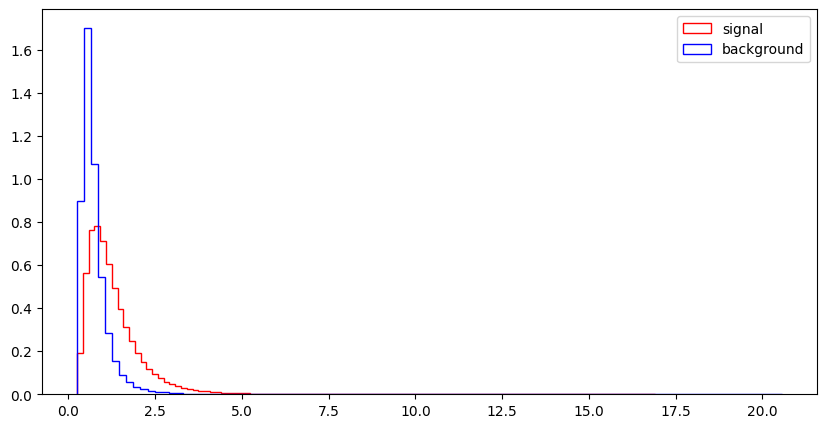

l_1_eta


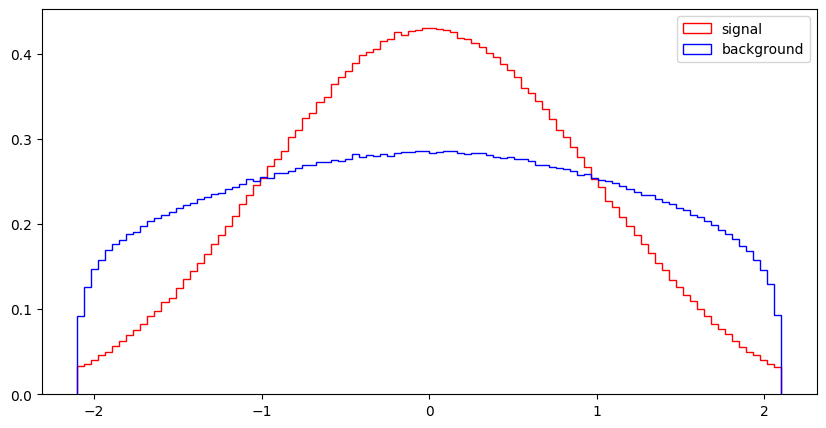

l_1_phi


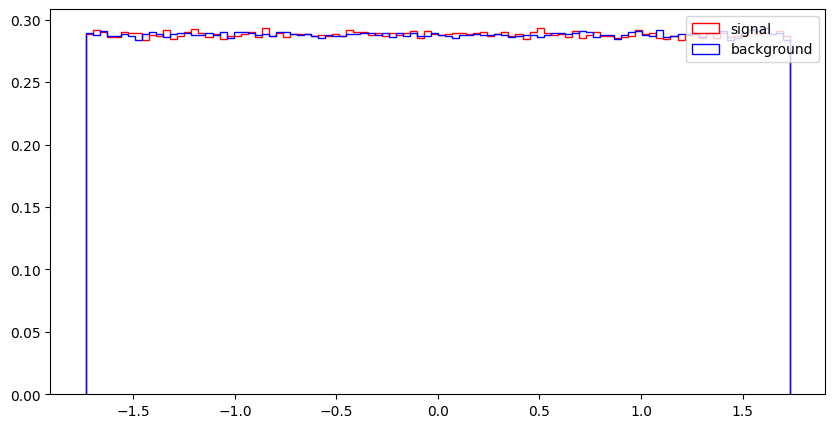

l_2_pT


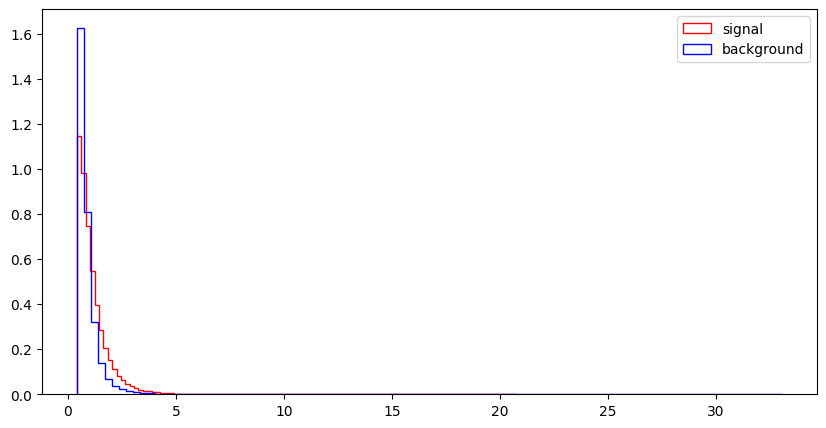

l_2_eta


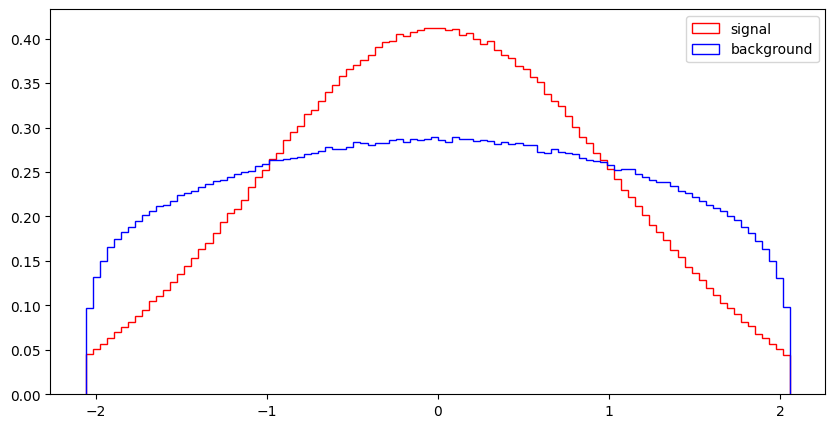

l_2_phi


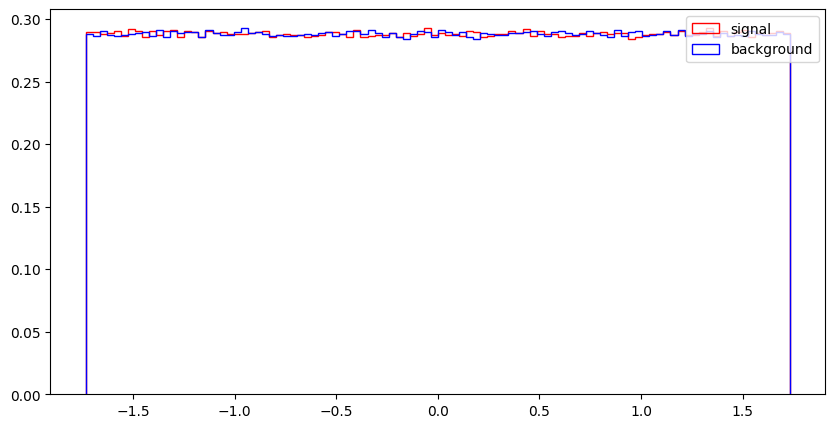

MET


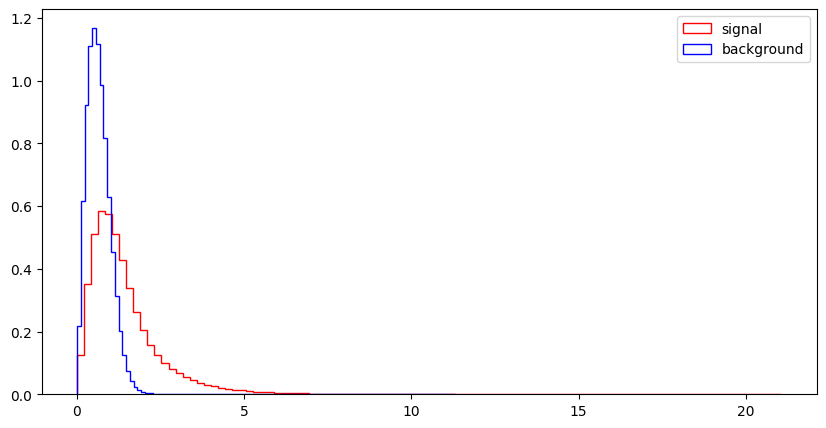

MET_phi


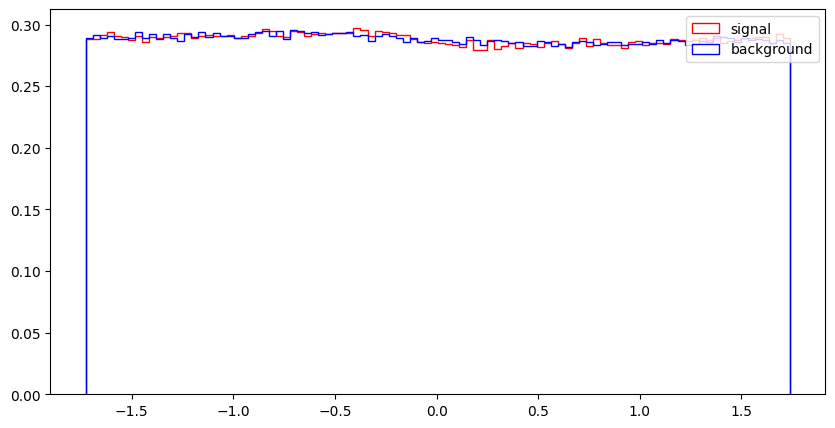

MET_rel


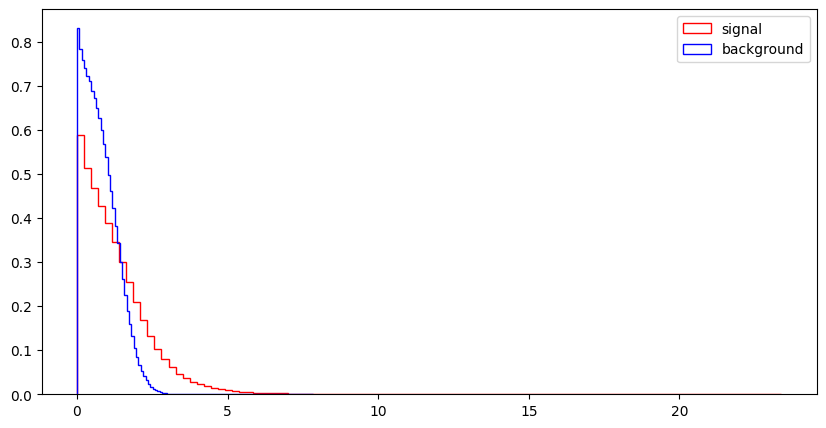

axial_MET


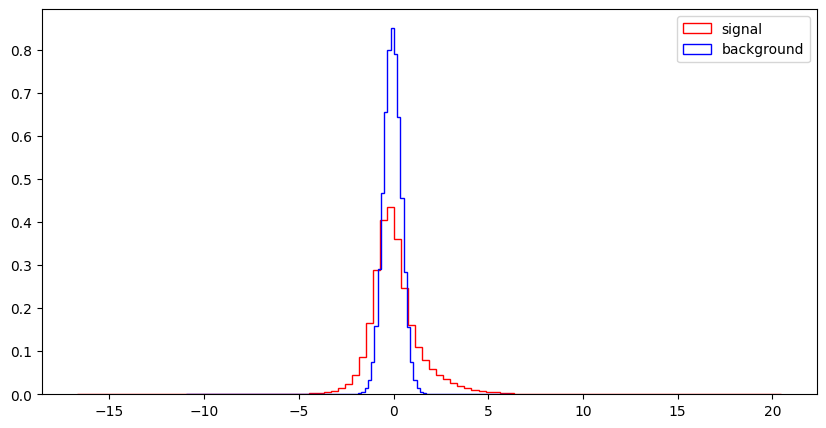

M_R


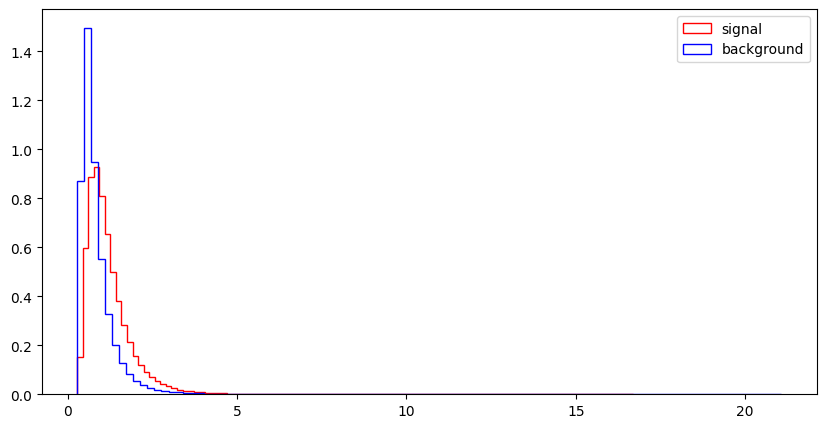

M_TR_2


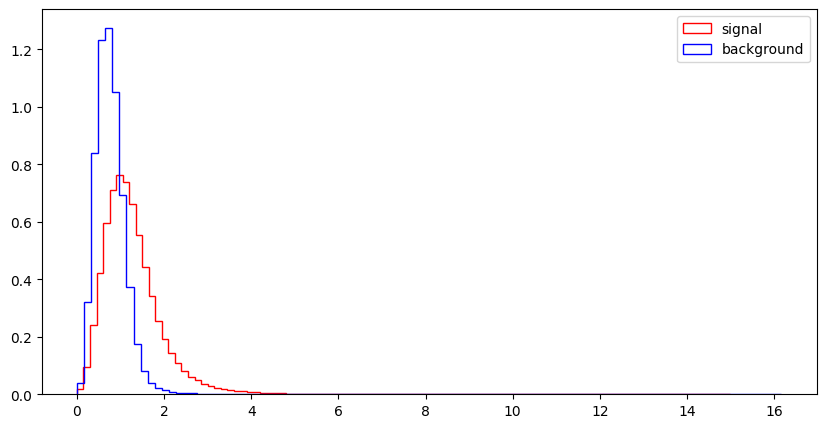

R


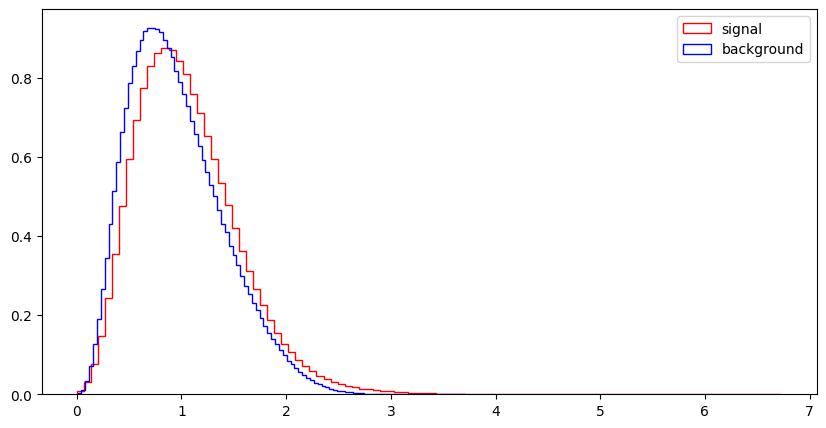

MT2


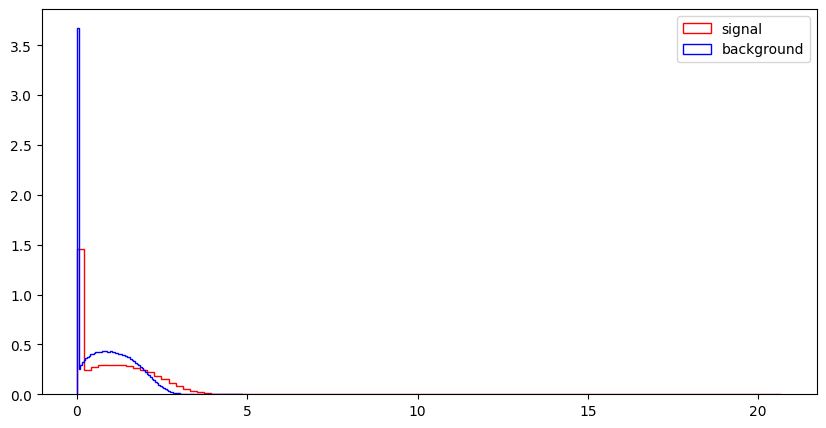

S_R


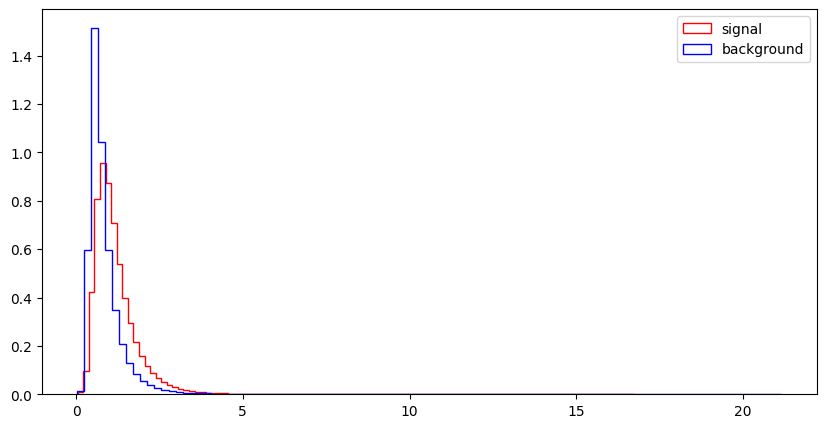

M_Delta_R


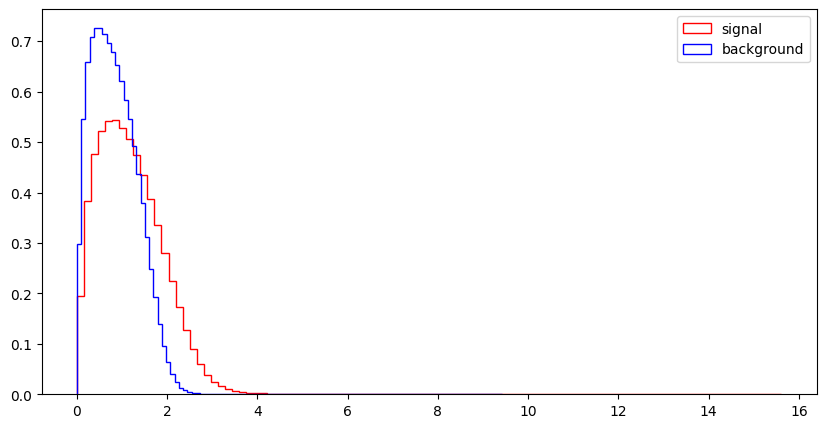

dPhi_r_b


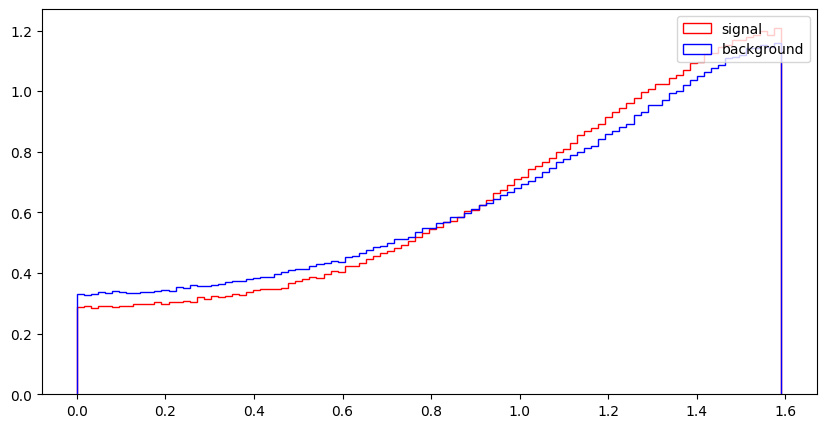

cos_theta_r1


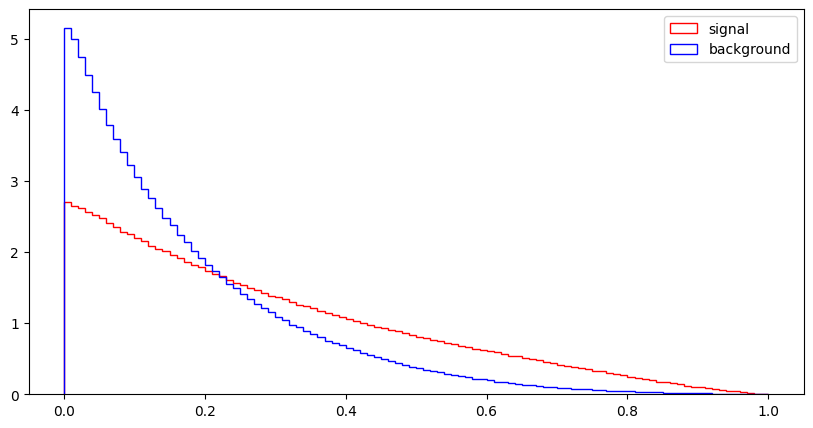

In [19]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

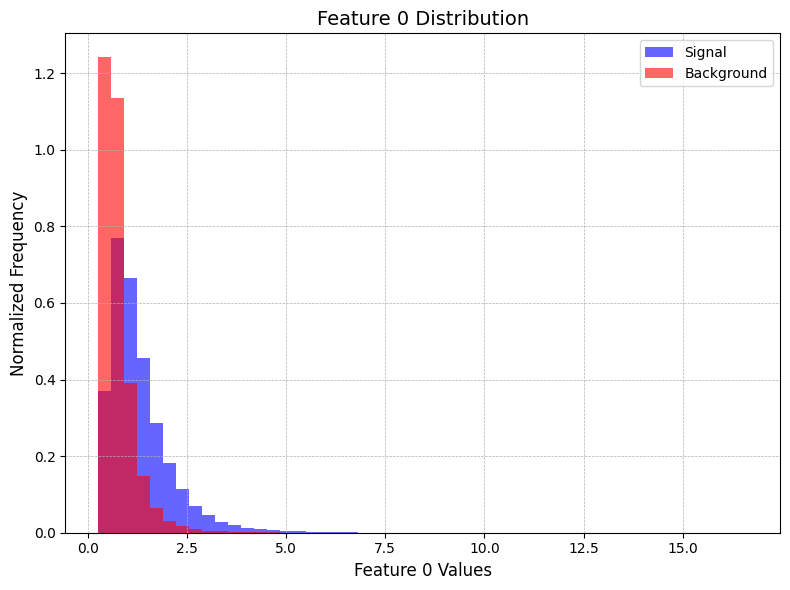

Saved plot for Feature 0 as 'feature_0_distribution.png'


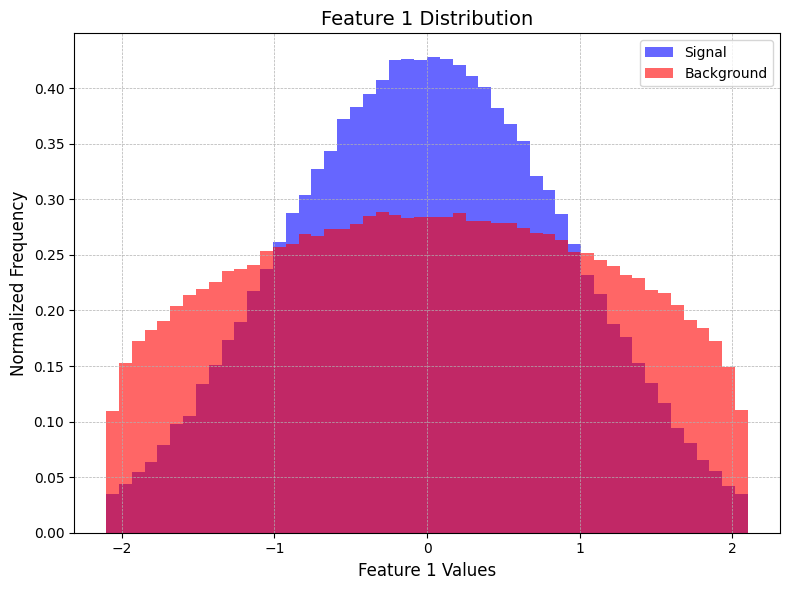

Saved plot for Feature 1 as 'feature_1_distribution.png'


In [20]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "SUSY-small.csv"
data = np.genfromtxt(file_path, delimiter=",", skip_header=0)
if data.ndim < 2:
    raise ValueError("The dataset appears to be empty or improperly formatted.")

labels = data[:, 0].astype(int)
features = data[:, 1:]

feature_indices = [0, 1]

bins = 50
colors = {"signal": "blue", "background": "red"}
alpha = 0.6

for idx, feature_idx in enumerate(feature_indices):
    if feature_idx >= features.shape[1]:
        raise ValueError(f"Feature index {feature_idx} is out of bounds for the dataset.")

    signal_data = features[labels == 1, feature_idx]
    background_data = features[labels == 0, feature_idx]

    combined_data = np.concatenate([signal_data, background_data])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), bins + 1)

    plt.figure(figsize=(8, 6))
    plt.hist(signal_data, bins=bin_edges, density=True, alpha=alpha, color=colors["signal"], label="Signal")
    plt.hist(background_data, bins=bin_edges, density=True, alpha=alpha, color=colors["background"], label="Background")

    plt.title(f"Feature {feature_idx} Distribution", fontsize=14)
    plt.xlabel(f"Feature {feature_idx} Values", fontsize=12)
    plt.ylabel("Normalized Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    output_filename = f"feature_{feature_idx}_distribution.png"
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)
    plt.show()

    print(f"Saved plot for Feature {feature_idx} as '{output_filename}'")


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

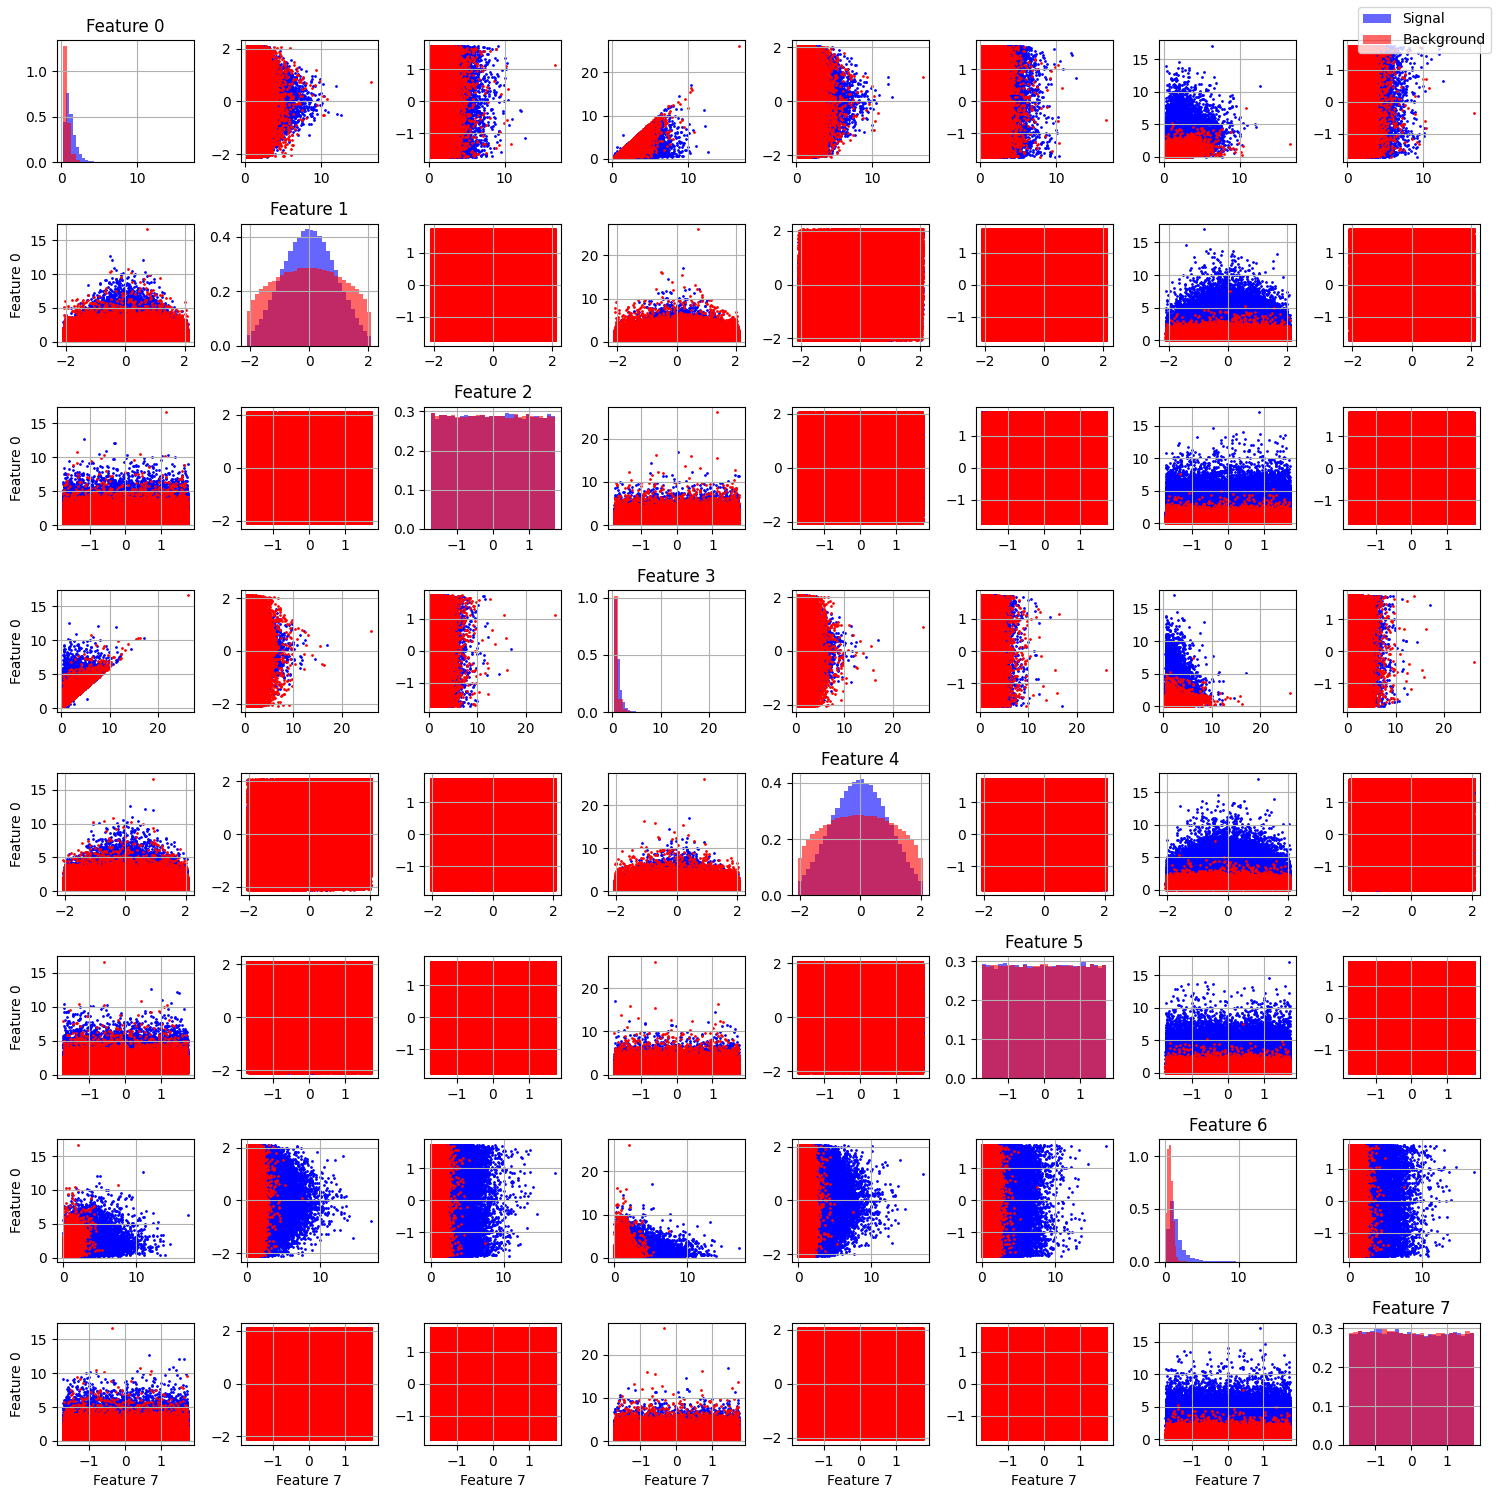

In [21]:
#part a
import matplotlib.pyplot as plt
import numpy as np

def create_pair_plots(data, labels, feature_indices, output_prefix):
    """
    Creates pair plots for a subset of features in the data.

    Parameters:
        data (ndarray): The feature dataset (excluding labels).
        labels (ndarray): The corresponding labels (1 for signal, 0 for background).
        feature_indices (list): Indices of features to include in the pair plot.
        output_prefix (str): Prefix for saved plot files.
    """
    signal = data[labels == 1]
    background = data[labels == 0]

    num_features = len(feature_indices)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

    for i, feature_x in enumerate(feature_indices):
        for j, feature_y in enumerate(feature_indices):
            ax = axes[i, j]
            if i == j:
                # Diagonal: Plot histograms
                ax.hist(signal[:, feature_x], bins=30, alpha=0.6, color="blue", label="Signal", density=True)
                ax.hist(background[:, feature_x], bins=30, alpha=0.6, color="red", label="Background", density=True)
                ax.set_title(f"Feature {feature_x}")
            else:
                # Off-diagonal: Plot scatter plots
                ax.scatter(signal[:, feature_x], signal[:, feature_y], s=1, color="blue", label="Signal")
                ax.scatter(background[:, feature_x], background[:, feature_y], s=1, color="red", label="Background")
                if i == num_features - 1:
                    ax.set_xlabel(f"Feature {feature_x}")
                if j == 0:
                    ax.set_ylabel(f"Feature {feature_y}")
            ax.grid(True)

    # Add legends only once
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{output_prefix}_pair_plots.png", dpi=300)
    plt.show()

# Example usage
low_level_features = list(range(0, 8))  # Adjust indices for low-level features
create_pair_plots(features, labels, low_level_features, "low_level")


In [22]:
#part b
def create_pair_plots_optimized(data, labels, feature_indices, output_prefix):
    """
    Optimized pair plot creation with precomputed histograms.

    Parameters:
        data (ndarray): The feature dataset (excluding labels).
        labels (ndarray): The corresponding labels (1 for signal, 0 for background).
        feature_indices (list): Indices of features to include in the pair plot.
        output_prefix (str): Prefix for saved plot files.
    """
    signal = data[labels == 1]
    background = data[labels == 0]

    num_features = len(feature_indices)
    hist_bins = 30  # Predefine number of bins
    precomputed_hist_signal = {idx: np.histogram(signal[:, idx], bins=hist_bins, density=True) for idx in feature_indices}
    precomputed_hist_background = {idx: np.histogram(background[:, idx], bins=hist_bins, density=True) for idx in feature_indices}

    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

    for i, feature_x in enumerate(feature_indices):
        for j, feature_y in enumerate(feature_indices):
            ax = axes[i, j]
            if i == j:
                # Use precomputed histograms
                bins_signal, edges = precomputed_hist_signal[feature_x]
                bins_background, _ = precomputed_hist_background[feature_x]
                bin_centers = 0.5 * (edges[:-1] + edges[1:])
                ax.plot(bin_centers, bins_signal, label="Signal", color="blue", alpha=0.6)
                ax.plot(bin_centers, bins_background, label="Background", color="red", alpha=0.6)
                ax.set_title(f"Feature {feature_x}")
            else:
                # Off-diagonal: Plot scatter plots
                ax.scatter(signal[:, feature_x], signal[:, feature_y], s=1, color="blue")
                ax.scatter(background[:, feature_x], background[:, feature_y], s=1, color="red")
                if i == num_features - 1:
                    ax.set_xlabel(f"Feature {feature_x}")
                if j == 0:
                    ax.set_ylabel(f"Feature {feature_y}")
            ax.grid(True)

    # Add legends only once
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{output_prefix}_pair_plots_optimized.png", dpi=300)
    plt.show()


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [26]:
pip install tabulate

In [27]:
import numpy as np

# Example data splitting into low-level and high-level features
low_level_features = features[:, :8]  # Assuming the first 8 are low-level
high_level_features = features[:, 8:]  # Assuming the rest are high-level

# Covariance and Correlation Matrices
low_level_cov = np.cov(low_level_features, rowvar=False)
high_level_cov = np.cov(high_level_features, rowvar=False)

low_level_corr = np.corrcoef(low_level_features, rowvar=False)
high_level_corr = np.corrcoef(high_level_features, rowvar=False)


Hint: Example code for embedding a `tabulate` table into a notebook:

In [24]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

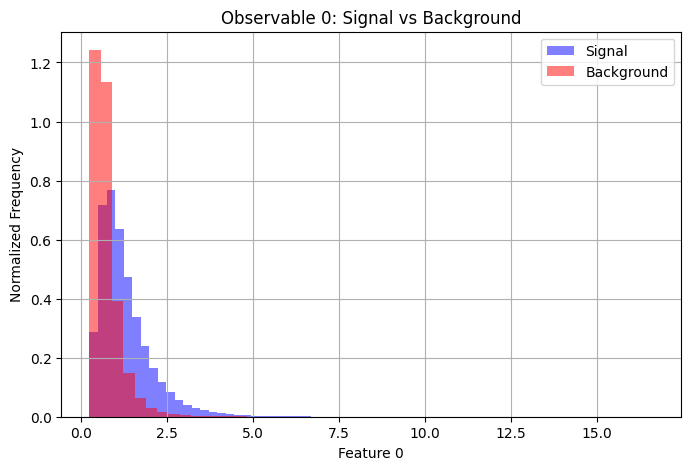

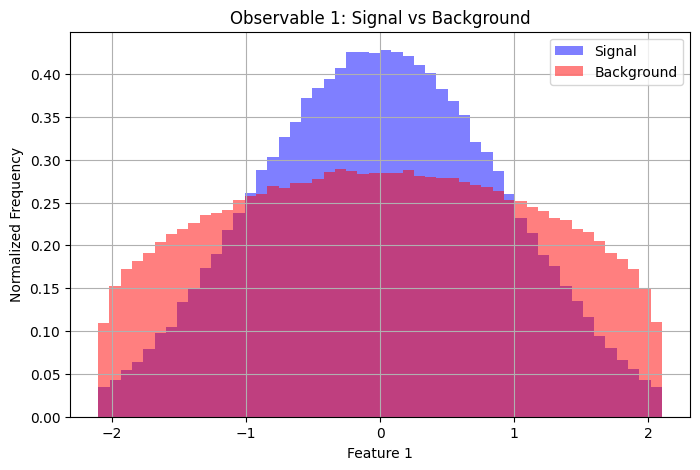

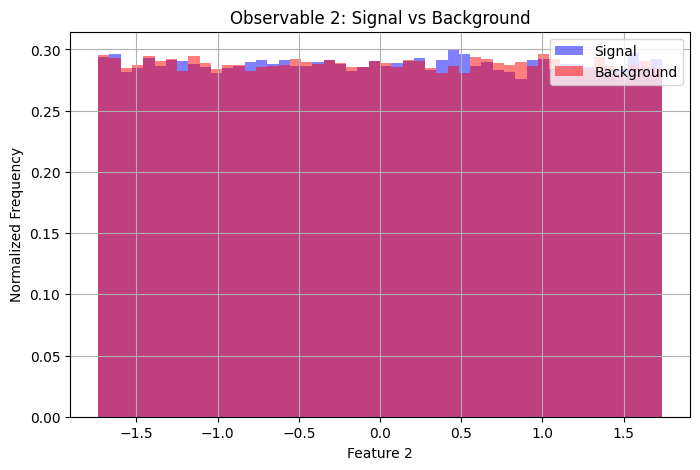

In [29]:
# Assuming 'data' is a NumPy array with labels in the first column
labels = data[:, 0]  # First column is the label
features = data[:, 1:]  # Remaining columns are features

# Split data into signal and background based on labels
signal = features[labels == 1]
background = features[labels == 0]

import matplotlib.pyplot as plt

observables = [0, 1, 2]  # Indices of features to analyze

for obs in observables:
    plt.figure(figsize=(8, 5))
    plt.hist(signal[:, obs], bins=50, density=True, alpha=0.5, label="Signal", color="blue")
    plt.hist(background[:, obs], bins=50, density=True, alpha=0.5, label="Background", color="red")
    plt.title(f"Observable {obs}: Signal vs Background")
    plt.xlabel(f"Feature {obs}")
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()


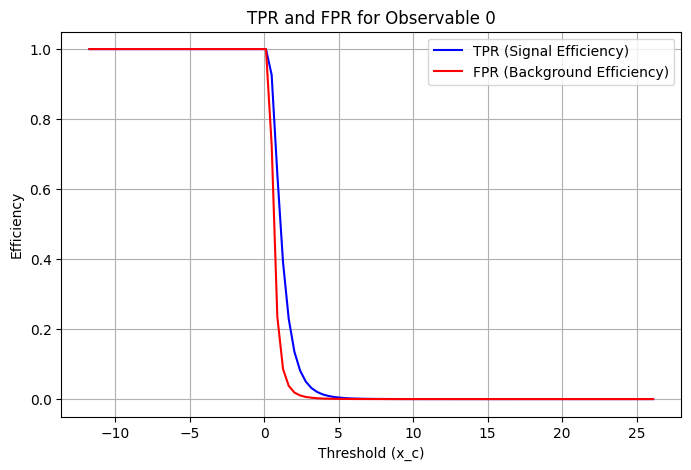

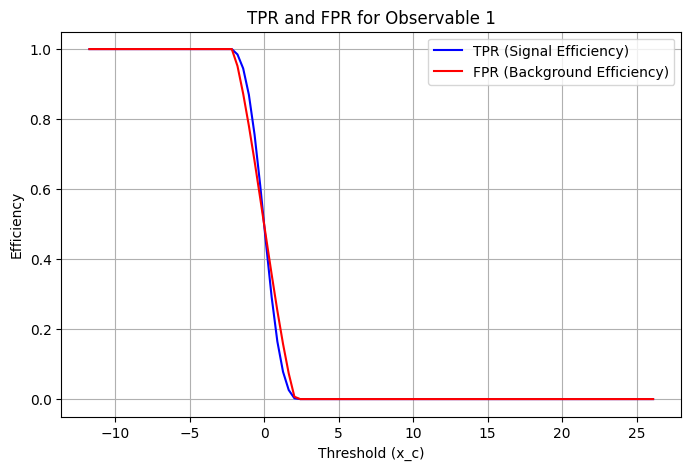

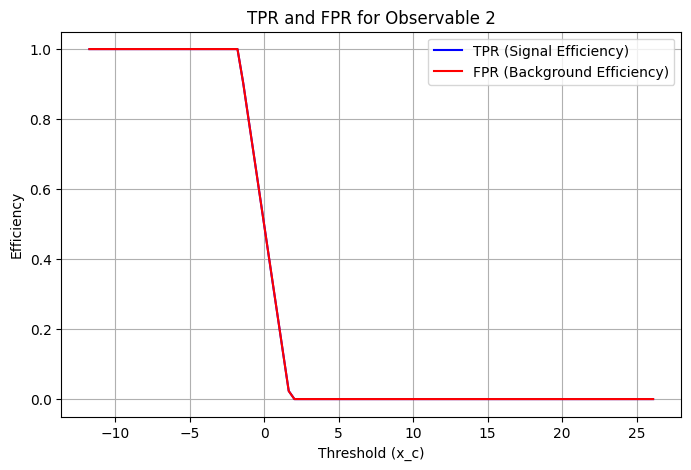

In [30]:
thresholds = np.linspace(np.min(features), np.max(features), 100)

for obs in observables:
    tpr = []
    fpr = []
    for x_c in thresholds:
        # Signal and background counts above/below threshold
        tp = np.sum(signal[:, obs] > x_c)  # True Positives
        fp = np.sum(background[:, obs] > x_c)  # False Positives
        fn = np.sum(signal[:, obs] <= x_c)  # False Negatives
        tn = np.sum(background[:, obs] <= x_c)  # True Negatives

        tpr.append(tp / (tp + fn))  # Signal efficiency
        fpr.append(fp / (fp + tn))  # Background efficiency

    # Plot TPR and FPR
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, tpr, label="TPR (Signal Efficiency)", color="blue")
    plt.plot(thresholds, fpr, label="FPR (Background Efficiency)", color="red")
    plt.title(f"TPR and FPR for Observable {obs}")
    plt.xlabel("Threshold (x_c)")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-31-7a4460031bd9>:17: RuntimeWarning: invalid value encountered in scalar divide
  sigma_S = N_S_prime / np.sqrt(N_S_prime + N_B_prime)


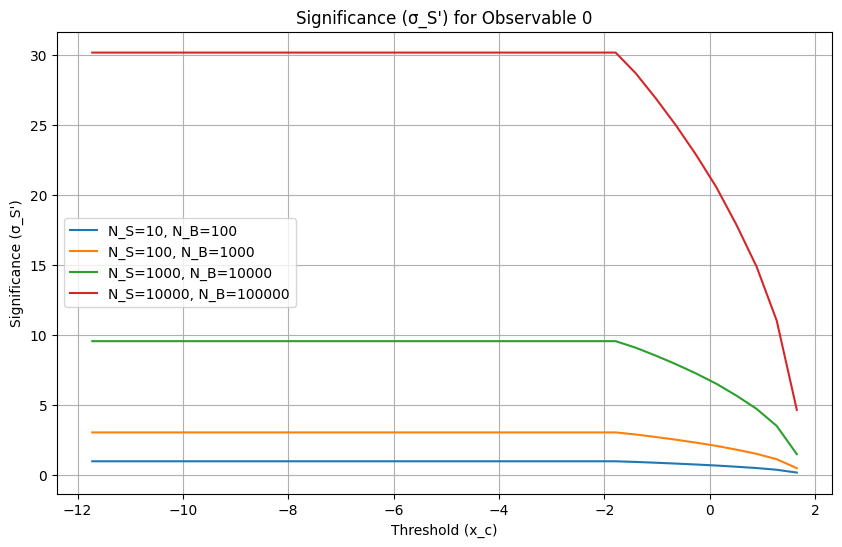

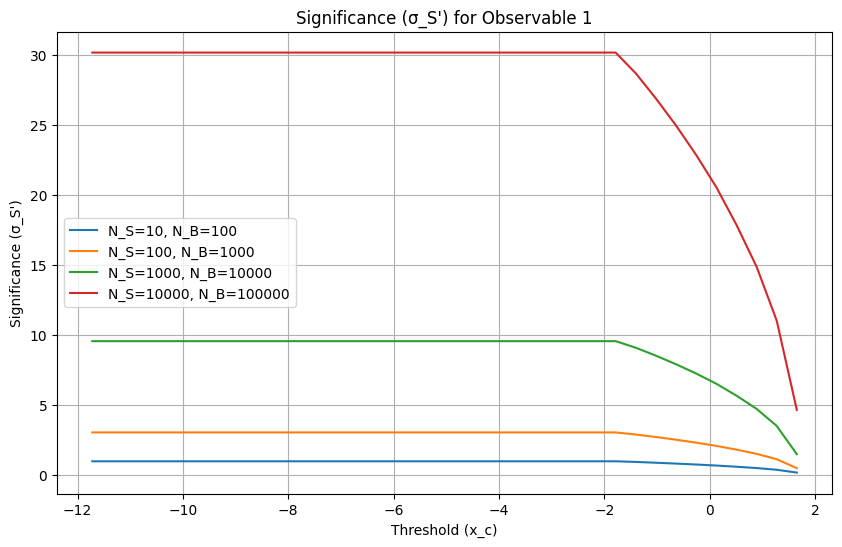

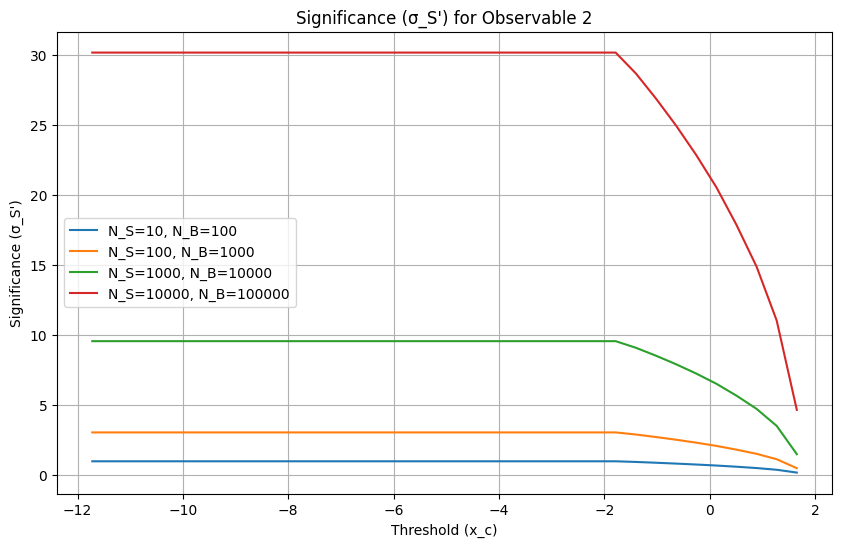

In [31]:
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]

for obs in observables:
    plt.figure(figsize=(10, 6))
    for scenario in scenarios:
        N_S, N_B = scenario["N_S"], scenario["N_B"]
        sigmas = []

        for x_c, tpr_value, fpr_value in zip(thresholds, tpr, fpr):
            N_S_prime = tpr_value * N_S
            N_B_prime = fpr_value * N_B
            sigma_S = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
            sigmas.append(sigma_S)

        # Plot significance
        plt.plot(thresholds, sigmas, label=f"N_S={N_S}, N_B={N_B}")

    plt.title(f"Significance (σ_S') for Observable {obs}")
    plt.xlabel("Threshold (x_c)")
    plt.ylabel("Significance (σ_S')")
    plt.legend()
    plt.grid(True)
    plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [32]:
# Selected observables and their thresholds (x_c) from significance plots
selected_observables = [0, 1, 2]  # Example: Observables with highest significance
cut_thresholds = [1.5, 2.0, 0.8]  # Example: Optimal x_c values from plots

print(f"Selected Observables: {selected_observables}")
print(f"Cut Thresholds: {cut_thresholds}")


Selected Observables: [0, 1, 2]
Cut Thresholds: [1.5, 2.0, 0.8]


In [33]:
from tabulate import tabulate

def cut_flow(data, labels, observables, thresholds, N_S, N_B):
    """
    Generate a cut-flow table for a given scenario.
    """
    # Initialize variables
    remaining_signal = data[labels == 1]
    remaining_background = data[labels == 0]

    results = []

    for i, (obs, threshold) in enumerate(zip(observables, thresholds)):
        # Apply cut
        remaining_signal = remaining_signal[remaining_signal[:, obs] > threshold]
        remaining_background = remaining_background[remaining_background[:, obs] > threshold]

        # Calculate efficiencies and significance
        epsilon_S = len(remaining_signal) / N_S
        epsilon_B = len(remaining_background) / N_B
        N_S_prime = epsilon_S * N_S
        N_B_prime = epsilon_B * N_B
        sigma_S_prime = N_S_prime / np.sqrt(N_S_prime + N_B_prime)

        results.append([f"Cut {i+1} (Feature {obs} > {threshold})", epsilon_S, epsilon_B, N_S_prime, N_B_prime, sigma_S_prime])

    return results

# Example scenarios
scenarios = [
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000},
]

# Generate cut-flow tables for each scenario
for scenario in scenarios:
    print(f"Scenario: N_S={scenario['N_S']}, N_B={scenario['N_B']}")
    table = cut_flow(features, labels, selected_observables, cut_thresholds, scenario["N_S"], scenario["N_B"])
    print(tabulate(table, headers=["Cut", "ε_S", "ε_B", "N_S'", "N_B'", "σ_S'"], floatfmt=".3f"))
    print()


Scenario: N_S=100, N_B=1000
Cut                          ε_S     ε_B       N_S'       N_B'     σ_S'
-----------------------  -------  ------  ---------  ---------  -------
Cut 1 (Feature 0 > 1.5)  652.010  13.969  65201.000  13969.000  231.726
Cut 2 (Feature 1 > 2.0)    0.740   0.134     74.000    134.000    5.131
Cut 3 (Feature 2 > 0.8)    0.190   0.034     19.000     34.000    2.610

Scenario: N_S=1000, N_B=10000
Cut                         ε_S    ε_B       N_S'       N_B'     σ_S'
-----------------------  ------  -----  ---------  ---------  -------
Cut 1 (Feature 0 > 1.5)  65.201  1.397  65201.000  13969.000  231.726
Cut 2 (Feature 1 > 2.0)   0.074  0.013     74.000    134.000    5.131
Cut 3 (Feature 2 > 0.8)   0.019  0.003     19.000     34.000    2.610

Scenario: N_S=10000, N_B=100000
Cut                        ε_S    ε_B       N_S'       N_B'     σ_S'
-----------------------  -----  -----  ---------  ---------  -------
Cut 1 (Feature 0 > 1.5)  6.520  0.140  65201.000  13969.000 

In [34]:
def analyze_correlation_impact(data, labels, observables, thresholds, N_S, N_B):
    """
    Analyze the effect of cut order and correlation on significance.
    """
    # Original order
    original_order = cut_flow(data, labels, observables, thresholds, N_S, N_B)
    print("Original Order Results:")
    print(tabulate(original_order, headers=["Cut", "ε_S", "ε_B", "N_S'", "N_B'", "σ_S'"], floatfmt=".3f"))

    # Reverse order
    reversed_order = cut_flow(data, labels, observables[::-1], thresholds[::-1], N_S, N_B)
    print("\nReversed Order Results:")
    print(tabulate(reversed_order, headers=["Cut", "ε_S", "ε_B", "N_S'", "N_B'", "σ_S'"], floatfmt=".3f"))

# Example scenario
scenario = {"N_S": 1000, "N_B": 10000}
analyze_correlation_impact(features, labels, selected_observables, cut_thresholds, scenario["N_S"], scenario["N_B"])


Original Order Results:
Cut                         ε_S    ε_B       N_S'       N_B'     σ_S'
-----------------------  ------  -----  ---------  ---------  -------
Cut 1 (Feature 0 > 1.5)  65.201  1.397  65201.000  13969.000  231.726
Cut 2 (Feature 1 > 2.0)   0.074  0.013     74.000    134.000    5.131
Cut 3 (Feature 2 > 0.8)   0.019  0.003     19.000     34.000    2.610

Reversed Order Results:
Cut                         ε_S    ε_B       N_S'       N_B'     σ_S'
-----------------------  ------  -----  ---------  ---------  -------
Cut 1 (Feature 2 > 0.8)  61.492  7.289  61492.000  72894.000  167.742
Cut 2 (Feature 1 > 2.0)   0.234  0.082    234.000    815.000    7.225
Cut 3 (Feature 0 > 1.5)   0.019  0.003     19.000     34.000    2.610


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



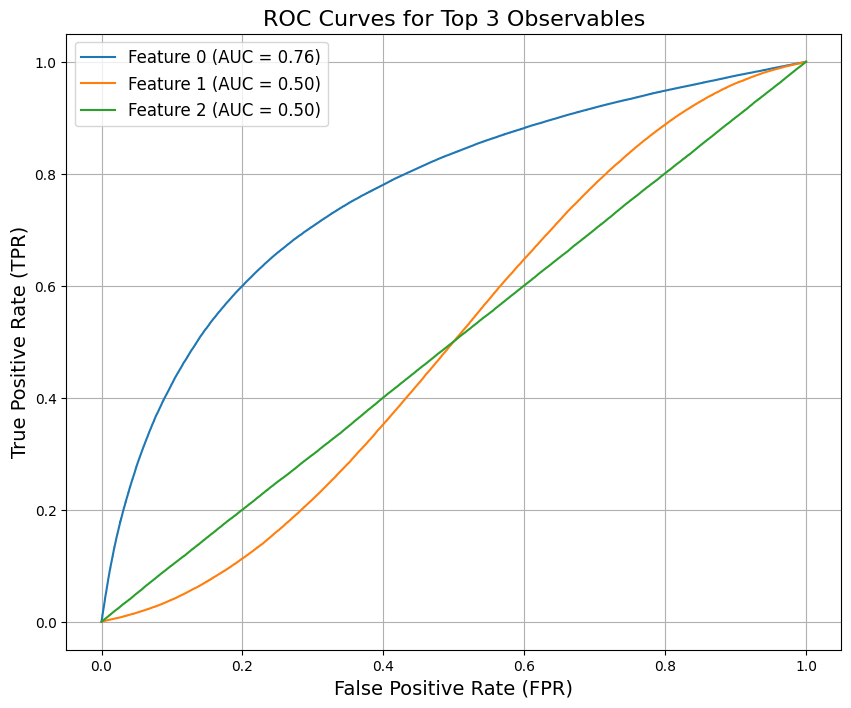

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Selected top 3 observables
selected_observables = [0, 1, 2]

# Create ROC curves for each observable
plt.figure(figsize=(10, 8))
for obs in selected_observables:
    # Calculate TPR and FPR
    y_true = labels  # True labels (1 for signal, 0 for background)
    y_scores = features[:, obs]  # Scores for the observable
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)  # Compute AUC

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Feature {obs} (AUC = {roc_auc:.2f})")

# Add plot details
plt.title("ROC Curves for Top 3 Observables", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


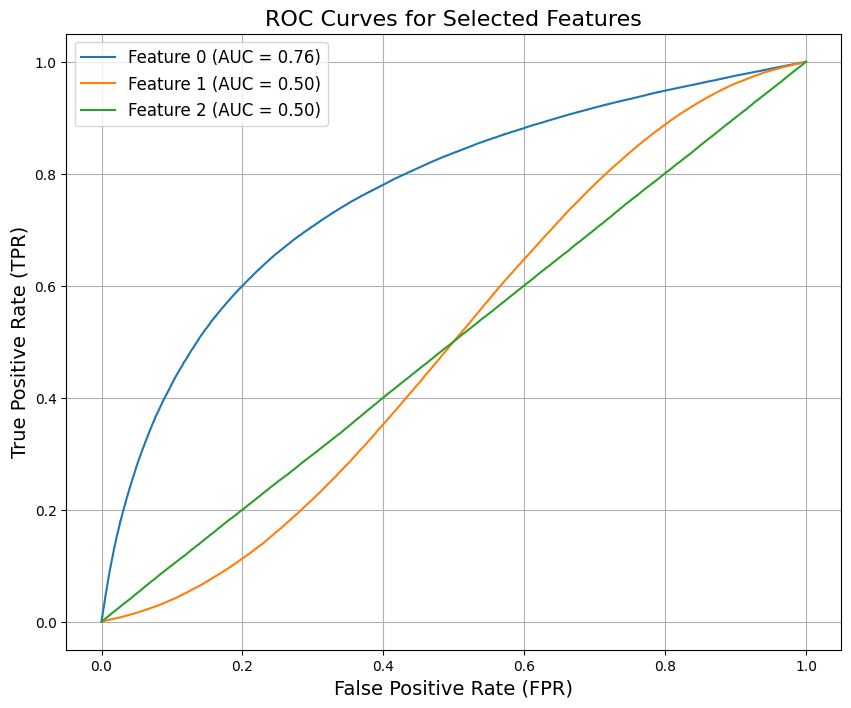

In [36]:
def plot_roc_curve(features, labels, observables, title="ROC Curve"):
    """
    Generate ROC curves for given observables.

    Parameters:
        features (ndarray): Feature data.
        labels (ndarray): True labels (1 for signal, 0 for background).
        observables (list): List of observable indices.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10, 8))
    for obs in observables:
        y_scores = features[:, obs]
        fpr, tpr, _ = roc_curve(labels, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Feature {obs} (AUC = {roc_auc:.2f})")

    plt.title(title, fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Example usage
plot_roc_curve(features, labels, selected_observables, title="ROC Curves for Selected Features")


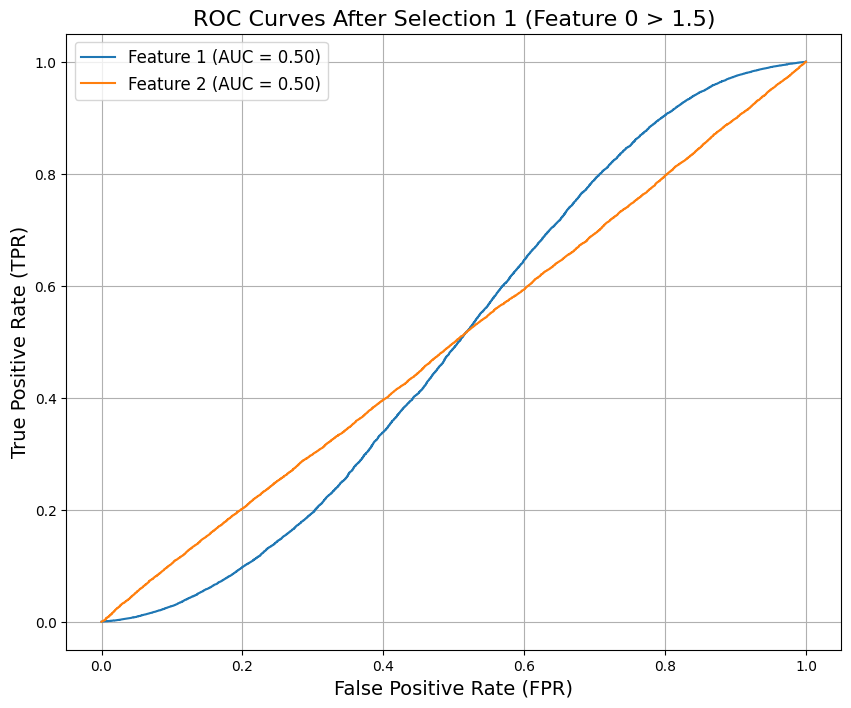

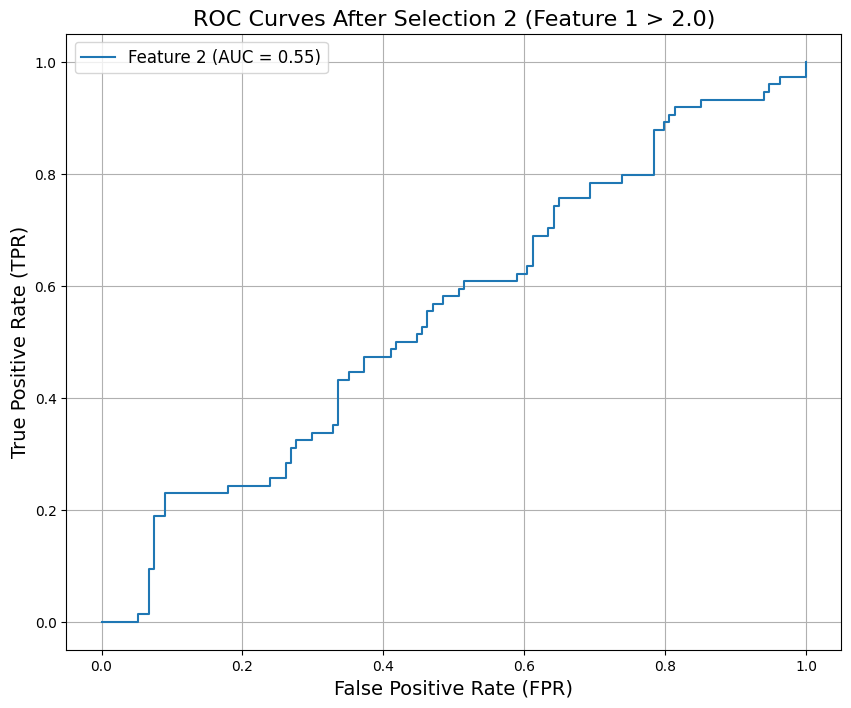

In [38]:
def plot_roc_after_selections(features, labels, observables, thresholds):
    """
    Generate ROC curves for observables after successive selections.

    Parameters:
        features (ndarray): Feature data.
        labels (ndarray): True labels (1 for signal, 0 for background).
        observables (list): List of observable indices.
        thresholds (list): Thresholds for each observable.
    """
    for i, (obs, threshold) in enumerate(zip(observables, thresholds)):
        # Apply selection
        selected_indices = features[:, obs] > threshold
        features = features[selected_indices]
        labels = labels[selected_indices]

        # Generate ROC curve for remaining observables
        remaining_observables = observables[i+1:]
        if len(remaining_observables) > 0:
            plot_roc_curve(features, labels, remaining_observables,
                           title=f"ROC Curves After Selection {i+1} (Feature {obs} > {threshold})")

# Example thresholds
thresholds = [1.5, 2.0, 0.8]

# Apply successive selections and plot ROC curves
plot_roc_after_selections(features, labels, selected_observables, thresholds)


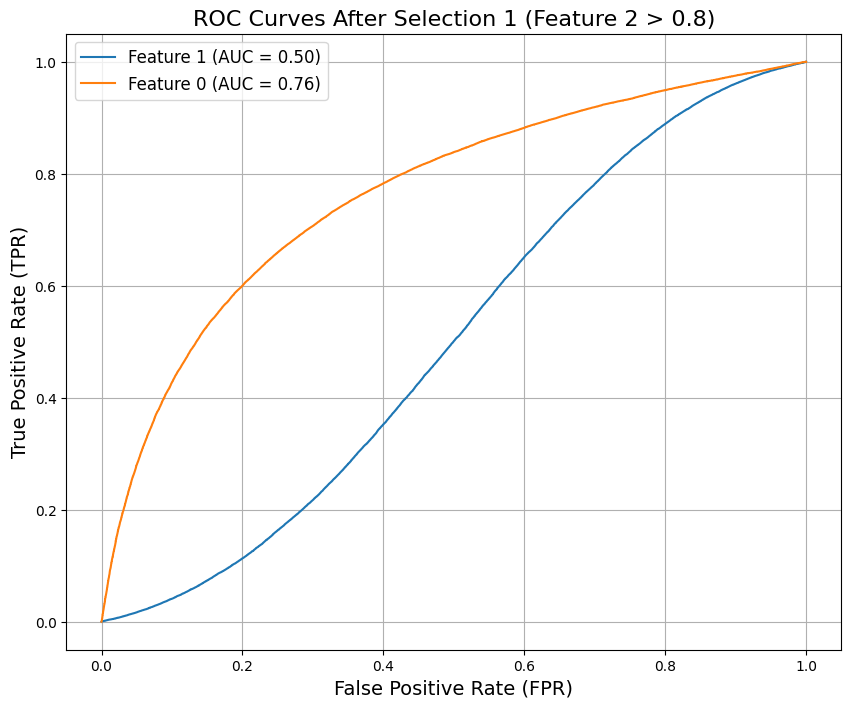

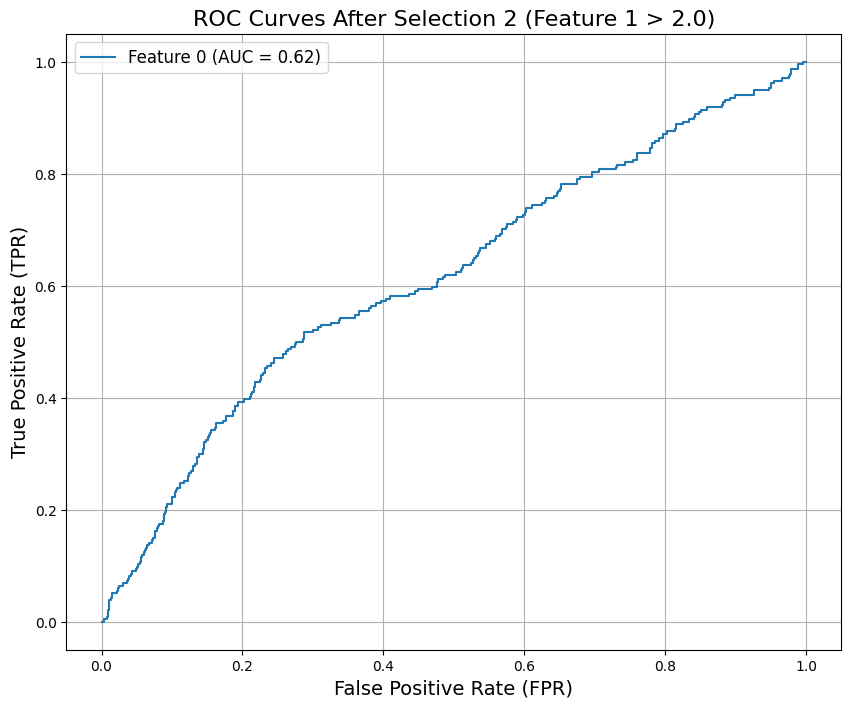

In [39]:
# Reverse the order of selections
reversed_observables = selected_observables[::-1]
reversed_thresholds = thresholds[::-1]

# Apply reversed selections and plot ROC curves
plot_roc_after_selections(features, labels, reversed_observables, reversed_thresholds)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [40]:
import numpy as np

# Calculate class means
mu_signal = np.mean(signal, axis=0)
mu_background = np.mean(background, axis=0)

# Between-class scatter matrix
mu_diff = mu_signal - mu_background
S_B = np.outer(mu_diff, mu_diff)

# Within-class scatter matrix
S_W_signal = np.cov(signal, rowvar=False, bias=True)
S_W_background = np.cov(background, rowvar=False, bias=True)
S_W = S_W_signal + S_W_background

print("Between-Class Scatter Matrix (S_B):\n", S_B)
print("\nWithin-Class Scatter Matrix (S_W):\n", S_W)


Between-Class Scatter Matrix (S_B):
 [[ 2.87970231e-01  4.58922304e-04  4.67467434e-04  1.38148662e-01
   1.54068049e-03  3.66095560e-04  4.13461344e-01 -6.36618070e-04
   2.71136238e-01  8.54657090e-02  1.82331687e-01  2.66557653e-01
   5.53227373e-02  7.37824064e-02  1.74241790e-01  1.84116478e-01
   1.54056891e-02  5.66281031e-02]
 [ 4.58922304e-04  7.31359210e-07  7.44977113e-07  2.20159917e-04
   2.45529768e-06  5.83426339e-07  6.58910580e-04 -1.01454317e-06
   4.32094896e-04  1.36201995e-04  2.90571971e-04  4.24798257e-04
   8.81648006e-05  1.17582959e-04  2.77679548e-04  2.93416294e-04
   2.45511986e-05  9.02450903e-05]
 [ 4.67467434e-04  7.44977113e-07  7.58848582e-07  2.24259293e-04
   2.50101531e-06  5.94289733e-07  6.71179491e-04 -1.03343396e-06
   4.40140500e-04  1.38738075e-04  2.95982420e-04  4.32707998e-04
   8.98064286e-05  1.19772353e-04  2.82849940e-04  2.98879704e-04
   2.50083417e-05  9.19254533e-05]
 [ 1.38148662e-01  2.20159917e-04  2.24259293e-04  6.62743950e-02


In [41]:
# Compute linear coefficients
S_W_inv = np.linalg.inv(S_W)
w = np.dot(S_W_inv, mu_diff)

print("Linear Coefficients (w):\n", w)


Linear Coefficients (w):
 [ 5.51955882e-01  1.49593171e-03  5.36443434e-04  2.58234790e-01
  9.61222183e-04  5.58153301e-04  3.72524857e-01  7.09491136e-04
  3.08842189e-02  6.32553532e-02 -1.17419923e-01  1.14553102e-02
 -5.10417308e-01 -7.72438074e-02 -3.92205562e-01  4.28418659e-01
 -7.58022136e-03  1.27524597e+00]


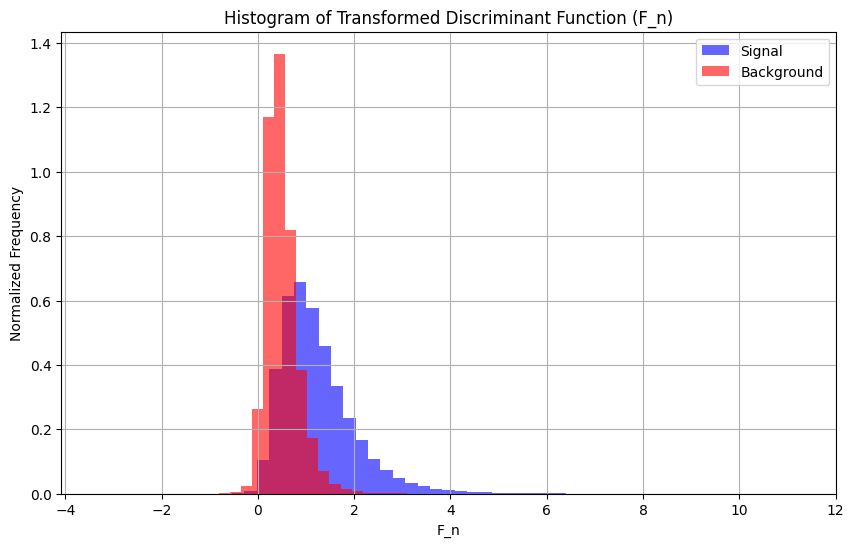

In [42]:
# Transform data
F_signal = np.dot(signal, w)
F_background = np.dot(background, w)

# Plot histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(F_signal, bins=50, alpha=0.6, label="Signal", color="blue", density=True)
plt.hist(F_background, bins=50, alpha=0.6, label="Background", color="red", density=True)
plt.title("Histogram of Transformed Discriminant Function (F_n)")
plt.xlabel("F_n")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(True)
plt.show()


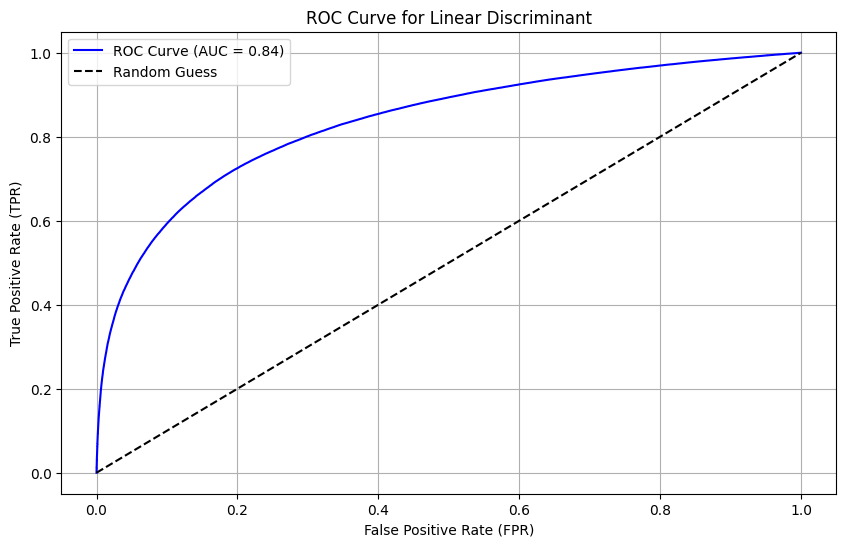

In [43]:
from sklearn.metrics import roc_curve, auc

# True labels
y_true = np.concatenate([np.ones(len(F_signal)), np.zeros(len(F_background))])
# Scores
y_scores = np.concatenate([F_signal, F_background])

# Compute ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Linear Discriminant")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Optimal significance
N_S = len(F_signal)
N_B = len(F_background)
thresholds = np.linspace(min(y_scores), max(y_scores), 100)

max_sigma = 0
for threshold in thresholds:
    N_S_prime = np.sum(F_signal > threshold)
    N_B_prime = np.sum(F_background > threshold)
    sigma = N_S_prime / np.sqrt(N_S_prime + N_B_prime) if (N_S_prime + N_B_prime) > 0 else 0
    max_sigma = max(max_sigma, sigma)

print("Maximal Significance (σ_S'):", max_sigma)


Maximal Significance (σ_S'): 356.7579473749455
